In [2]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Using:

* <strike>ERR431617: B cell memory</strike>
* ERR431572: B cell naive
* Microarray data: use one same cell type, one other distant cell type. Can we see the difference?

In [90]:
df = pd.read_csv('summary.simple.tsv', sep='\t')
df.head()

,sample_id,gene_name,est_counts,tpm
0,1,A1BG,80.232280,11.155641
1,1,A1CF,18.042401,0.382263
2,1,A2M,3.000000,1.226161
3,1,A2ML1,21.912401,2.756862
4,1,A2MP1,2.000000,0.092441


count    34832.000000
mean        28.709233
std        291.816455
min          0.000000
25%          0.000000
50%          0.515240
75%          6.705417
max      22917.900000
Name: tpm, dtype: float64

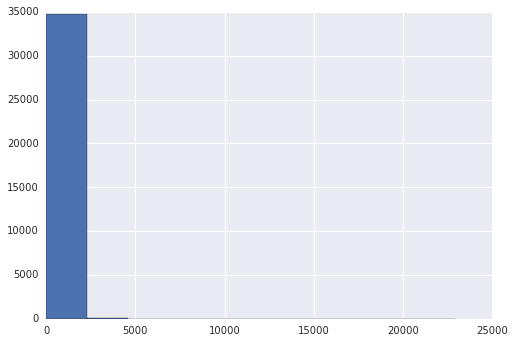

In [91]:
df.tpm.hist()
df.tpm.describe()

In [92]:
# get outliers (http://stackoverflow.com/a/31502974/130164)
df[((df.tpm - df.tpm.mean()) / df.tpm.std()).abs() > 3]

,sample_id,gene_name,est_counts,tpm
652,1,AC010970.2,24263.000000,2478.540000
1481,1,AC246787.8,13601.133660,1630.865846
3263,1,B2M,18599.995760,5728.604670
4830,1,CCNL1,12811.258600,1282.913390
4933,1,CD37,8314.153390,1529.731931
4957,1,CD69,5977.999000,970.521000
4961,1,CD74,39999.546260,6523.488970
4962,1,CD79A,6328.999000,1099.270000
5767,1,CLK1,6342.336148,990.738248
6067,1,COX4I1,6154.036060,1206.193410


In [93]:
df=df[df['tpm']!=0]

In [94]:
df['logtpm'] = df.tpm.apply(np.log2)
df['logcnt'] = df.est_counts.apply(np.log2)

count    21822.000000
mean         1.876540
std          3.187812
min        -25.593901
25%         -0.525184
50%          1.747749
75%          4.235832
max         14.484187
Name: logtpm, dtype: float64

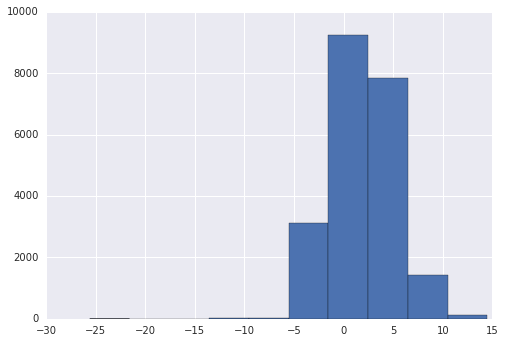

In [95]:
df.logtpm.hist()
df.logtpm.describe()

What we want to do:
Treat microarray and rnaseq data as two samples. How much does it look like they're the same phenotype?

* Compare diffs
* Do hierarchical clustering and see how it looks. Are patterns the same?
* Look for differentially expressed genes, see how many are different (shouldn't be many)
* Sort by most highly expressed transcripts in each sample. Compare ratio between expression of top two.


Apparently running voom transformation on RNAseq data enables treating it like microarray data, i.e. doing linear modeling and GSEA.

In [96]:
# get microarray data
ma = pd.read_csv('../all_expressions.tsv', sep='\t')

In [97]:
del ma['Unnamed: 0']
del ma['ACCNUM']
del ma['Relabel']
del ma['DESC']

In [98]:
ma.head()

,geneid,probeid,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,RFC2,1053_at,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
1,RFC2,203696_s_at,2858.885,3889.223,2887.030,4171.271,4308.615,3523.738,1085.860,1109.435,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
2,HSPA6,117_at,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
3,HSPA6,213418_at,76.702,85.718,168.155,706.366,463.835,427.057,27.579,119.920,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
4,PAX8,121_at,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,...,26.766424,117.425553,58.012974,31.797787,102.044136,99.058819,147.641189,135.526908,38.741434,157.813189


In [99]:
for c in ma.columns:
    if 'naive' in c.lower():
        print c

Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]
Bcell-naive-2 [HG-U133A] [IRIS_GSE22886|GSM565309]
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]
Bcell-naive-5 [HG-U133A] [IRIS_GSE22886|GSM565312]
Bcell-naive-6 [HG-U133A] [IRIS_GSE22886|GSM565313]
Bcell-naive-7 [HG-U133A] [IRIS_GSE22886|GSM565314]


In [101]:
for c in ma.columns:
    if 'neutrophil' in c.lower():
        print c

A_LW_neutrophil_U133A.CEL
A_MF_neutrophils_U133A.CEL
A_LW_neutrophil_U133A [Chtanova_immune|A_LW_neutrophil_U133A]
A_MF_neutrophils_U133A [Chtanova_immune|A_MF_neutrophils_U133A]
Neutrophil-Resting-1 [HG-U133A] [IRIS_GSE22886|GSM565378]
Neutrophil-Resting-2 [HG-U133A] [IRIS_GSE22886|GSM565379]
Neutrophil-Resting-3 [HG-U133A] [IRIS_GSE22886|GSM565380]
Neutrophil-Resting-4 [HG-U133A] [IRIS_GSE22886|GSM565381]
Neutrophil-Resting-5 [HG-U133A] [IRIS_GSE22886|GSM565382]


In [102]:
ma = ma.set_index('geneid')[[
        'Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]',
        'Neutrophil-Resting-1 [HG-U133A] [IRIS_GSE22886|GSM565378]'
    ]]

In [105]:
ma.columns = ['Bcell', 'Neutrophil'] # related, unrelated
ma.head()

,Bcell,Neutrophil
geneid,,
RFC2,178.716943,177.474794
RFC2,178.716943,177.474794
HSPA6,56.191778,3185.117837
HSPA6,56.191778,3185.117837
PAX8,339.781267,278.156498


In [106]:
rna = df.set_index('gene_name')[['logtpm', 'logcnt']]
rna.head()

,logtpm,logcnt
gene_name,,
A1BG,3.479702,6.326111
A1CF,-1.387362,4.173319
A2M,0.294148,1.584963
A2ML1,1.463027,4.453676
A2MP1,-3.435319,1.000000


In [107]:
ma.index, rna.index

(Index([u'RFC2', u'RFC2', u'HSPA6', u'HSPA6', u'PAX8', u'PAX8', u'PAX8',
        u'PAX8', u'PAX8', u'PAX8',
        ...
        u'SCAF4', u'SCAF4', u'ZNF324B', u'ALS2CL', u'RNF126P1', u'TUBBP5',
        u'KCNE4', u'GALR3', u'TMEM231', u'NPEPL1'],
       dtype='object', name=u'geneid', length=17918),
 Index([u'A1BG', u'A1CF', u'A2M', u'A2ML1', u'A2MP1', u'A3GALT2', u'A4GALT',
        u'AAAS', u'AACS', u'AACSP1',
        ...
        u'ZZZ3', u'bP-21201H5.1', u'bP-21264C1.3', u'bP-2171C21.4',
        u'bP-2171C21.6', u'bP-2189O9.1', u'bP-2189O9.2', u'bP-2189O9.4', u'pk',
        u'yR211F11.2'],
       dtype='object', name=u'gene_name', length=21822))

In [108]:
assert len(rna.index) == len(rna.index.unique())

In [109]:
ma = ma.reset_index().groupby("geneid").agg('mean')


In [110]:
ma.head()

,Bcell,Neutrophil
geneid,,
A1CF,592.243979,469.842065
A2M,49.771470,144.998331
A4GALT,81.824334,17.479528
A4GNT,595.486500,421.491447
AAAS,39.527998,56.803877


In [111]:
assert len(ma.index) == len(ma.index.unique())

In [112]:
def compare_two_lists(a,b):
    x,y = set(a), set(b)
    print 'uniques:'
    print 'intersect: ', len(x&y)
    print 'in left ONLY : not in right:', len(x-y)
    print 'in right ONLY : not in left:', len(y-x)
print 'compare microarray (left), rna (right) gene names'
compare_two_lists(ma.index, rna.index)

compare microarray (left), rna (right) gene names
uniques:
intersect:  10087
in left ONLY : not in right: 890
in right ONLY : not in left: 11735


Why are there so many new genes in RNA?

In [113]:
intersect= pd.merge(ma, rna, left_index=True,right_index=True, how='inner')
assert intersect.shape[0] == len(set(ma.index) & set(rna.index))
intersect.head()

,Bcell,Neutrophil,logtpm,logcnt
A1CF,592.243979,469.842065,-1.387362,4.173319
A2M,49.771470,144.998331,0.294148,1.584963
A4GALT,81.824334,17.479528,-0.765860,1.000000
AAAS,39.527998,56.803877,3.380071,5.807354
AACS,618.230944,297.532754,4.844738,7.170448


In [114]:
intersect['Bcell'] = intersect.Bcell.apply(np.log2)
intersect['Neutrophil'] = intersect.Neutrophil.apply(np.log2)

In [115]:
intersect.head()

,Bcell,Neutrophil,logtpm,logcnt
A1CF,9.210048,8.876032,-1.387362,4.173319
A2M,5.637247,7.179892,0.294148,1.584963
A4GALT,6.354458,4.127594,-0.765860,1.000000
AAAS,5.304803,5.827917,3.380071,5.807354
AACS,9.272002,8.216905,4.844738,7.170448


In [116]:
intersect.describe()

,Bcell,Neutrophil,logtpm,logcnt
count,10087.000000,10087.000000,10087.000000,10087.000000
mean,8.298995,7.967483,2.815807,6.123150
std,1.792546,2.089902,3.148938,3.159525
min,-1.454213,-0.946620,-19.702978,-17.937767
25%,7.232926,6.638216,0.563311,3.711959
50%,8.647778,8.128003,3.147108,6.409391
75%,9.500687,9.217096,5.178122,8.543783
max,15.892516,16.358804,12.925729,15.287696


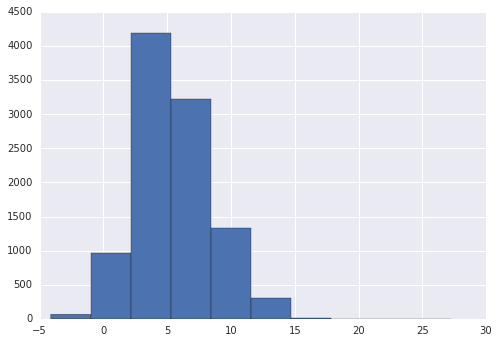

In [118]:
(intersect.Bcell - intersect.logtpm).hist()

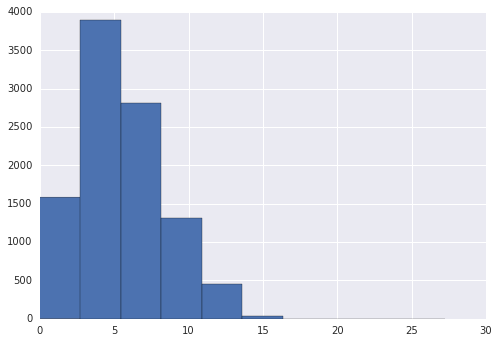

In [119]:
(intersect.Bcell - intersect.logtpm).abs().hist()

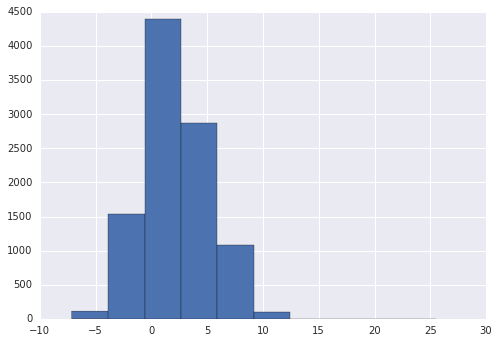

In [120]:
(intersect.Bcell - intersect.logcnt).hist()

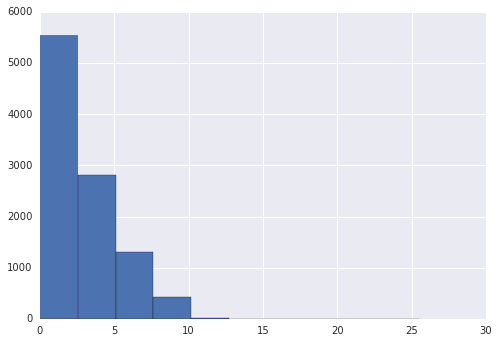

In [121]:
(intersect.Bcell - intersect.logcnt).abs().hist()

other cell type

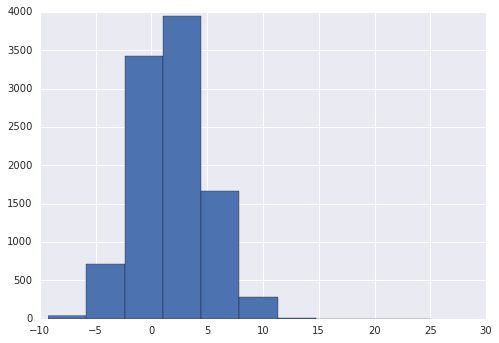

In [122]:
(intersect.Neutrophil - intersect.logcnt).hist()

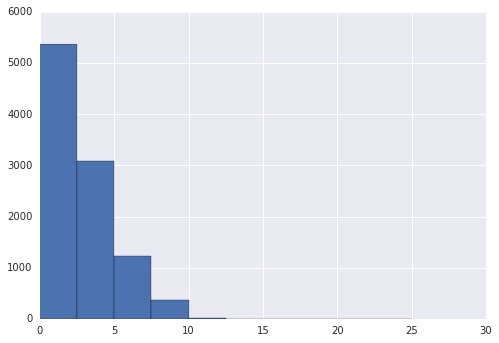

In [123]:
(intersect.Neutrophil - intersect.logcnt).abs().hist()

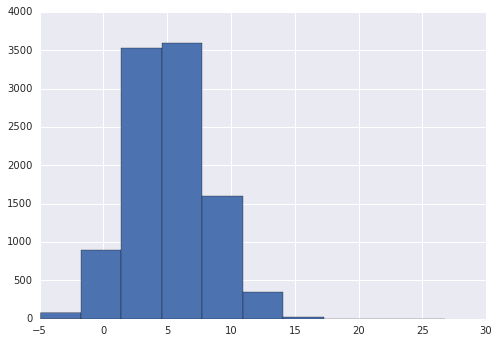

In [125]:
(intersect.Neutrophil - intersect.logtpm).hist()

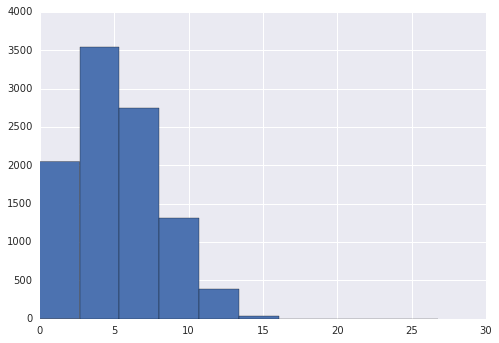

In [124]:
(intersect.Neutrophil - intersect.logtpm).abs().hist()

Difference plots between RNA-seq, microarray versions of B-cells naive look exactly like difference plots between RNA-seq B-cells naive and microarray neutrophil. Bad!